In [7]:
import numpy as np 
import scipy as sc 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_circles

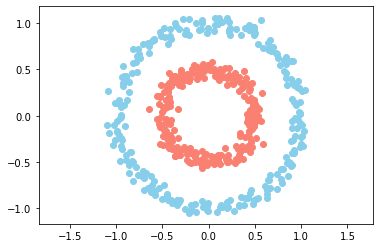

In [19]:
# Crear dataset
# Para la ayuda make_circles?

# Nº de registros de datos
n=500
# caracteristicas de los registros de nuestros datos
p=2

X,Y = make_circles(n_samples=n, factor=0.5, noise=0.05)

plt.scatter(X[Y==0,0], X[Y==0,1],c="skyblue")
plt.scatter(X[Y==1,0], X[Y==1,1],c="salmon")
plt.axis("equal")
plt.show()

In [20]:
# Creamos una clase para 
# La red neuronal son posibles de vectorizar
# Dentro de una misma capa puedo vectorizarlas
# Cada capa es un módulo
# => Clase para que se refiera a una capa

# Clase de la capa de la red
class neural_layer():
    # Nº de conexiones => n_conn
    # Nº de neuronas => n_neur
    # Funcion de activacion para las neuronas => act_f
    def __init__(self, n_conn, n_neur, act_f):
        self.act_f = act_f
        self.b = np.random.rand(1,n_neur)*2-1
        self.W = np.random.rand(n_conn,n_neur)*2-1
        

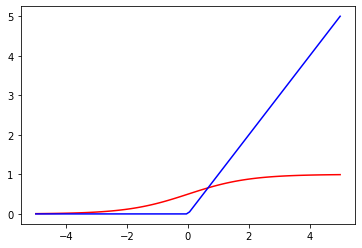

In [31]:
# Funcion de activacion
# Son la funcion por la cual se pasa la suma ponderada que se realiza en la neurona 
# y se introduce en la RN no linealidades que permite combinar muchas neuronas.
#

sigm = (lambda x: 1 / (1 + np.e ** (-x)),
        lambda x: x * (1-x))

relu = lambda x: np.maximum(0,x)

_x = np.linspace(-5,5, 100)
plt.plot(_x, sigm[0](_x), c="red")
plt.plot(_x, relu(_x),c="blue")

In [34]:
l0 = neural_layer(p,4, sigm)
l1 = neural_layer(4, 8, sigm)
# ...

def create_nn(topology, act_f):
    nn=[]
    for l, layer in enumerate(topology[:-1]):
        nn.append(neural_layer(topology[l], topology[l+1], act_f))
        
    return nn 


In [56]:
topology = [p,4,8,16,8,4,1]

neural_net = create_nn(topology, sigm)

# Funcion de coste
# error cuadrático medio: Yp:, Yr: np.mean((Yp-Yr)**2)
l2_cost = (lambda Yp, Yr: np.mean((Yp-Yr)**2),
           lambda Yp, Yr: (Yp - Yr))
# Entrenamiento de la red neuronal
def train(neural_net, X, Y, l2_cost, lr=0.5, train=True):
    out = [(None, X)]
    #  Forward pass
    # Vector de entrada pasarlo capa por capa
    # Suma ponderada: Le sumamos el valor de entrada X *W , le sumamos el valor de vallas y luego la suma pasa a la funcion de activacion
    for l, layer in enumerate(neural_net):
        z = out[-1][1] @ neural_net[l].W + neural_net[l].b
        a = neural_net[l].act_f[0](z)
        out.append((z,a))
        
    print(l2_cost[0](out[-1][1],Y))
    if train:
        # Backward pass
        # Calcular derivadas parciales
        delta = []
        for l in reversed(range(0, len(neural_net))):
            z = out[l+1][0]
            a = out[l+1][1]
            print(a.shape)
            
            if l == len(neural_net)-1:
                # Calcular delta ñultima capa
                deltas.insert(0,l2_cost[1](a,Y)*neural_net[l].act_f[1](a))
            else
                deltas.insert(0,deltas[0] @ neural_net[l+1].W * neural_net[l].act_f[1](a))
            # Calcular delta respecto a capa previa
        # Gradient descent
        
train(neural_net,X,Y,l2_cost,0.5)

SyntaxError: invalid syntax (<ipython-input-56-b60e51c463b6>, line 33)